In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [22]:
hmap_label = "myelinmap"
alpha = 1.5
id = 1
method = "orthogonal"
metric = "pearsonr"

with h5py.File(f"{PROJ_DIR}/results/reconstruction/rsFC_recon_hmap-None_nmodes-100_method-orthogonal_metric-pearsonr.h5", "r") as f:
    hom_fc_recon_corr = f["fc_recon_score"][:]
    hom_evals = f['evals'][:]

with h5py.File(f"{PROJ_DIR}/results/reconstruction/id-1/rsFC_recon_hmap-{hmap_label}_alpha-{alpha:.2f}.h5", "r") as f:
    het_fc_recon_corr = f["fc_recon_score"][:]
    het_evals = f['evals'][:]

In [23]:
print(np.nanmean(hom_fc_recon_corr), np.nanmean(het_fc_recon_corr))

0.48316487046403195 0.4872591481841729


## FC reconstruction accuracy - Recon curves

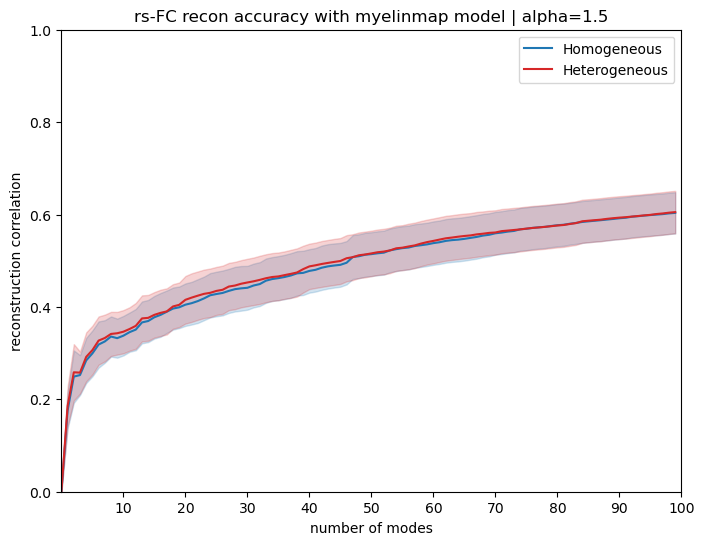

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

hom_fc_corr_avg = np.nanmean(hom_fc_recon_corr, axis=0)
het_fc_corr_avg = np.nanmean(het_fc_recon_corr, axis=0)

ax.plot(hom_fc_corr_avg, color="tab:blue", label="Homogeneous")
ax.plot(het_fc_corr_avg, color="tab:red", label=hmap_label)
ax.legend()

# Plot standard deviation
hom_std = np.nanstd(hom_fc_recon_corr, axis=0)
het_std = np.nanstd(het_fc_recon_corr, axis=0)
ax.fill_between(range(len(hom_std)), hom_fc_corr_avg - hom_std, hom_fc_corr_avg + hom_std, color="tab:blue", alpha=0.2)
ax.fill_between(range(len(het_std)), het_fc_corr_avg - het_std, het_fc_corr_avg + het_std, color="tab:red", alpha=0.2)

ax.set_xlabel("number of modes")
ax.set_ylabel("reconstruction correlation")
ax.set_title(f"rs-FC recon accuracy with {hmap_label} model | alpha={alpha:.1f}")
ax.set_xticks(range(10, 110, 10))
# ax.set_xticklabels([str(i+1) for i in range(10, 100, 10)])
ax.set_ylim(0, 1)
ax.set_xlim(0, 100)

plt.show()

## FC reconstruction accuracy - Stacked bar chart

[20 40 59 79]
[15 32 46 61]


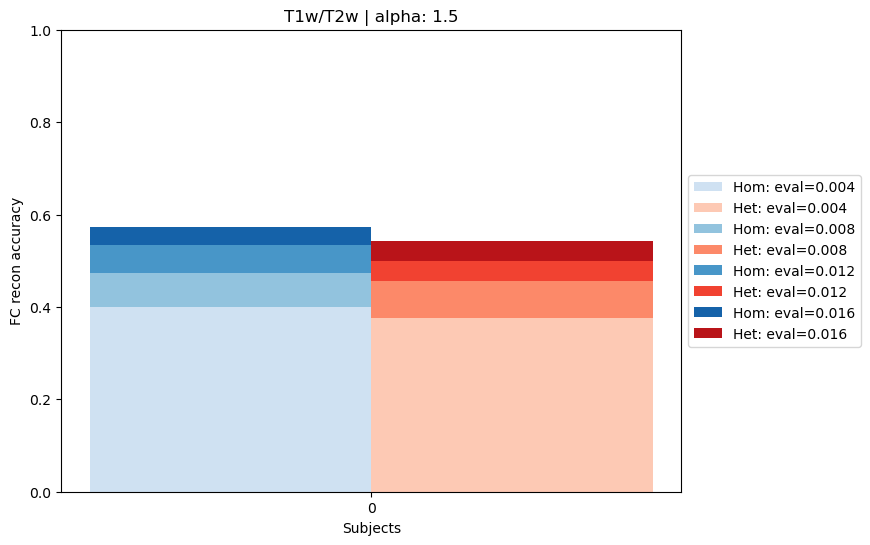

In [25]:
def generate_shades(base_color, n, vmin=0.2, vmax=0.8):
    cmap = plt.get_cmap(base_color, 100)
    return [mcolors.to_hex(cmap(vmin + (vmax - vmin) * i / (n - 1))) for i in range(n)]

# modesq = [5, 10, 20, 50, 100]
evalsq = [0.004, 0.008, 0.012, 0.016]
hom_modesq = np.searchsorted(hom_evals, evalsq, side='left') - 1
het_modesq = np.searchsorted(het_evals, evalsq, side='left') - 1
print(hom_modesq)
print(het_modesq)

# Generate colors dynamically
blues = generate_shades('Blues', len(evalsq))  # Light to dark blue
reds = generate_shades('Reds', len(evalsq))  # Light to dark red

fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(1)  # the label locations
width = 0.4  # the width of the bars

# Initialize bottom arrays
bottom_hom, bottom_het = 0, 0
# Generate stacked bar plot
for i, eval in enumerate(evalsq):
    ax.bar(x - width/2, hom_fc_corr_avg[hom_modesq[i]-1] - bottom_hom, width=width, bottom=bottom_hom, label=f'Hom: eval={eval}', color=blues[i])
    ax.bar(x + width/2, het_fc_corr_avg[het_modesq[i]-1] - bottom_het, width=width, bottom=bottom_het, label=f'Het: eval={eval}', color=reds[i])
    
    # Update bottom values for next iteration
    bottom_hom = hom_fc_corr_avg[hom_modesq[i]-1]
    bottom_het = het_fc_corr_avg[het_modesq[i]-1]

# Labels and title
ax.set_xlabel('Subjects')
ax.set_ylabel('FC recon accuracy')
ax.set_title(f'T1w/T2w | alpha: {alpha}')
ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylim(0, 1)

# Move legend outside to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()